# Data Processing

In [1]:
import xml.etree.ElementTree as ET
from openpyxl import Workbook
from collections import defaultdict
from datetime import datetime

def extract_steps_to_xlsx(xml_file, xlsx_file, group_by="daily"):
    """
    Extracts step data from an Apple Health XML file and writes it to an Excel file.

    Args:
        xml_file (str): Path to the XML file.
        xlsx_file (str): Path to the output Excel file.
        group_by (str): "daily" or "hourly" to group step counts by day or hour.
    """
    # Parse XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Create a dictionary to store step counts
    step_data = defaultdict(int)

    # Extract step records
    for record in root.findall("Record"):
        if record.attrib.get("type") == "HKQuantityTypeIdentifierStepCount":
            # Extract date and step count value
            start_date = record.attrib.get("startDate")
            steps = int(float(record.attrib.get("value")))

            # Parse the timestamp
            date_time = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S %z")

            # Group by day or hour
            if group_by == "daily":
                key = date_time.date()  # Group by date (YYYY-MM-DD)
            elif group_by == "hourly":
                key = date_time.strftime("%Y-%m-%d %H:00")  # Group by hour (YYYY-MM-DD HH:00)
            else:
                raise ValueError("Invalid group_by value. Use 'daily' or 'hourly'.")

            # Aggregate step counts
            step_data[key] += steps

    # Create a new Excel workbook and select the active sheet
    workbook = Workbook()
    sheet = workbook.active

    # Set headers
    headers = ["Date" if group_by == "daily" else "Date & Hour", "Steps"]
    sheet.append(headers)

    # Write step data to Excel
    for key, steps in sorted(step_data.items()):
        sheet.append([key, steps])

    # Save the workbook to the specified file
    workbook.save(xlsx_file)
    print(f"Step data has been successfully written to {xlsx_file}")

# Example usage
extract_steps_to_xlsx(
    r"C:\Users\AkselDindisyan\Desktop\3.1 Junior\CS 210\Proje\Datas\apple_health_export\export.xml",
    'Step_Excel_Apple.xlsx',
    group_by="daily"  # Change to "hourly" for hourly grouping and "daily for daily grouping". 
)



Step data has been successfully written to Step_Excel_Apple.xlsx


# Getting Data From Csv

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864


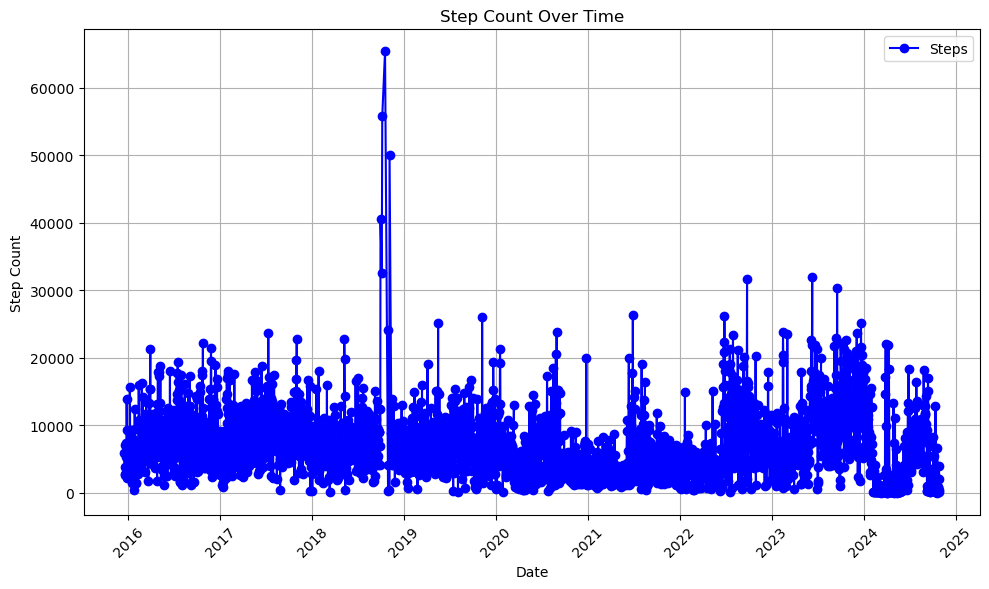

In [2]:
#Possible excels
#Step_Excel_Android
#Step_Excel_Apple

#Plots basic graph
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
# Replace 'your_health_data.xlsx' with the actual path to your Excel file
data = pd.read_excel('Step_Excel_Apple.xlsx')

# Check the data to ensure it loaded correctly
print(data.head())

# Convert 'Date' column to datetime, if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Steps'], marker='o', color='b', label='Steps')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Detecting Outliers

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864
Identified Outliers:
           Date  Steps
103  2016-03-28  21304
133  2016-04-27  17906
138  2016-05-02  17916
143  2016-05-07  18718
181  2016-06-14  17984
...         ...    ...
2982 2024-03-29  22035
2993 2024-04-09  21923
2995 2024-04-11  18367
3070 2024-06-28  18336
3130 2024-08-27  18150

[101 rows x 2 columns]


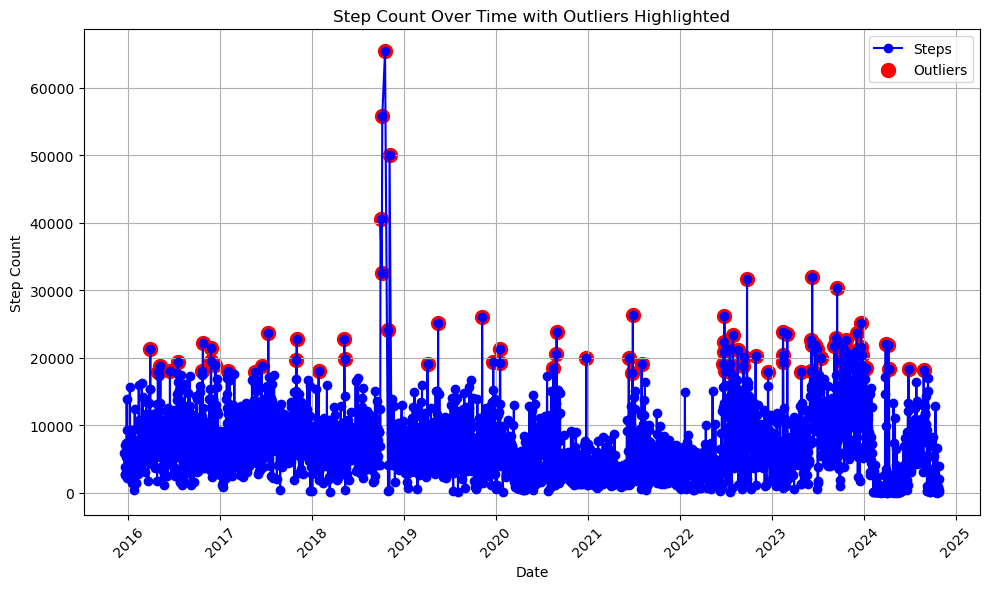

In [3]:
#Finds Outliers
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Step_Excel_Apple.xlsx'
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} does not exist.")
    exit()

# Check the data to ensure it loaded correctly
print(data.head())

# Convert 'Date' column to datetime, if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Steps'].quantile(0.25)
Q3 = data['Steps'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Steps'] < lower_bound) | (data['Steps'] > upper_bound)]

# Print outliers
print("Identified Outliers:")
print(outliers)

# Plot the data and highlight outliers
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Steps'], marker='o', color='b', label='Steps')
plt.scatter(outliers['Date'], outliers['Steps'], color='r', label='Outliers', s=100)
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time with Outliers Highlighted')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Printing Histogram

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864


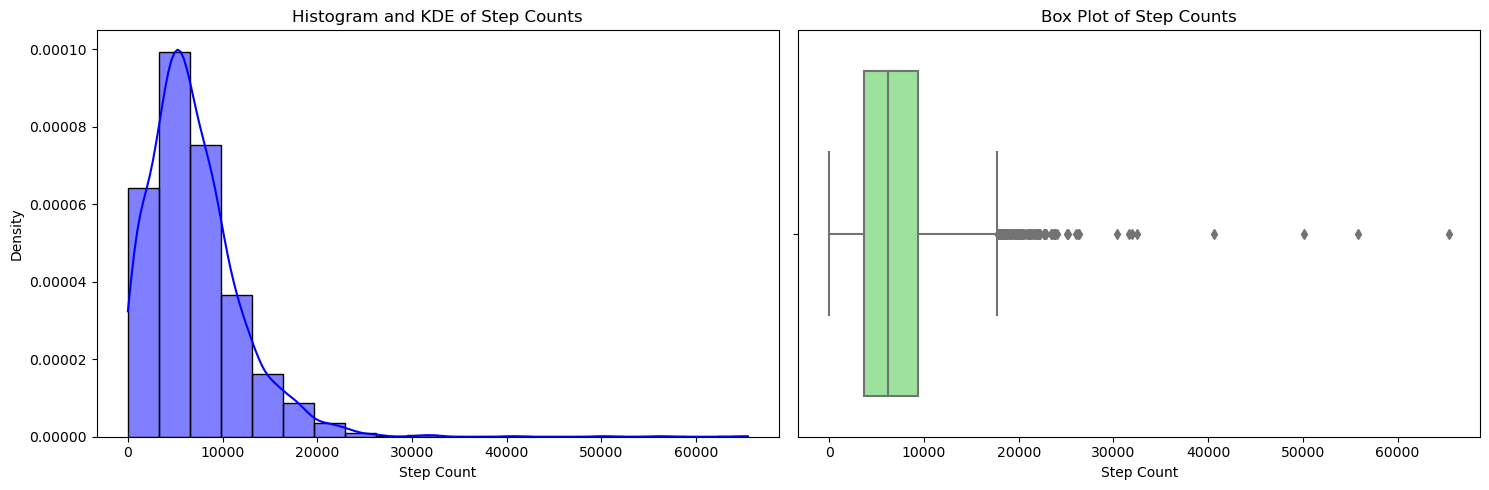

Mean: 6999.08
Standard Deviation: 4895.10
Median: 6171.00


In [4]:
#Step count distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Step_Excel_Apple.xlsx'
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} does not exist.")
    exit()

# Check the data to ensure it loaded correctly
print(data.head())

# Convert 'Date' column to datetime, if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Plot the distribution of step counts
plt.figure(figsize=(15, 5))

# Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(data['Steps'], bins=20, kde=True, color='b', stat='density', alpha=0.5)
plt.title('Histogram and KDE of Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Density')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Steps'], color='lightgreen')
plt.title('Box Plot of Step Counts')
plt.xlabel('Step Count')

plt.tight_layout()
plt.show()

# Calculate key attributes
mean = data['Steps'].mean()
std_dev = data['Steps'].std()
median = data['Steps'].median()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median: {median:.2f}")



## Understanding Data by Years and Months

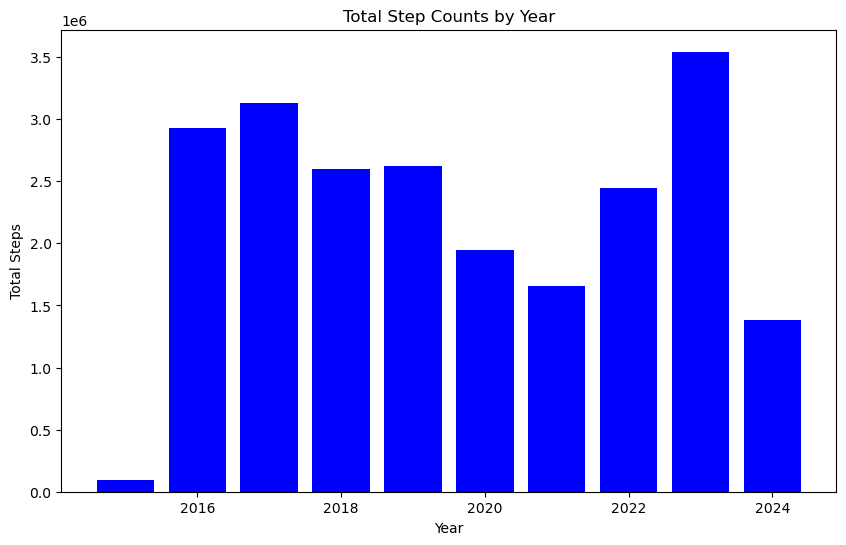

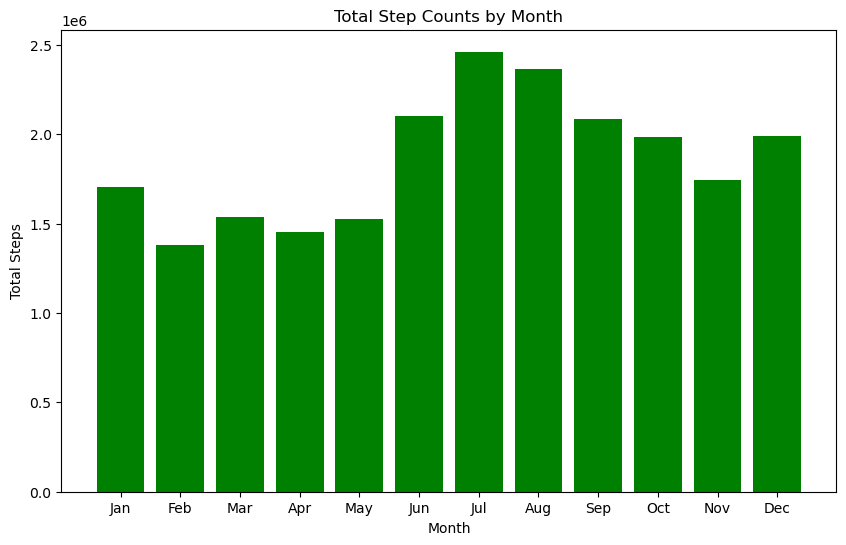

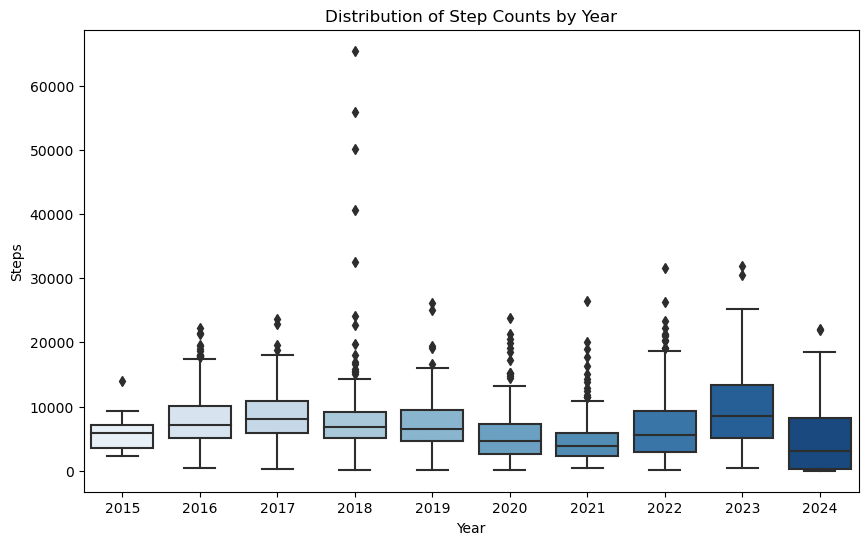

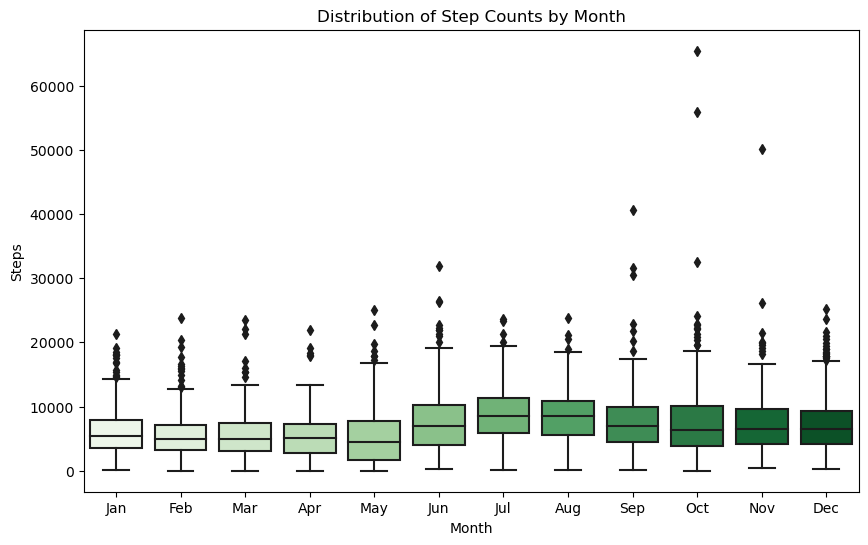

In [8]:
# Analyze and plot data grouped by year and month
def analyze_and_plot_steps(data):
    # Add 'Year' and 'Month' columns
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month

    # Group by year and sum steps
    steps_by_year = data.groupby('Year')['Steps'].sum().reset_index()

    # Group by month across all years and sum steps
    steps_by_month = data.groupby('Month')['Steps'].sum().reset_index()

    # Plot histogram of step counts by year
    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_year['Year'], steps_by_year['Steps'], color='blue')
    plt.title("Total Step Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Total Steps")
    plt.show()

    # Plot histogram of step counts by month
    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_month['Month'], steps_by_month['Steps'], color='green')
    plt.title("Total Step Counts by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Steps")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

    # Plot distribution of steps by year
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Year'], y=data['Steps'], palette="Blues")
    plt.title("Distribution of Step Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Steps")
    plt.show()

    # Plot distribution of steps by month
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Month'], y=data['Steps'], palette="Greens")
    plt.title("Distribution of Step Counts by Month")
    plt.xlabel("Month")
    plt.ylabel("Steps")
    plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

# Example usage
analyze_and_plot_steps(data)


# Data Analysis

## Weekend vs Weekdays

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864
Mean Steps on Weekends: 6424.75
Mean Steps on Weekdays: 7230.48

Weekend Standard Deviation: 5196.76
Weekday Standard Deviation: 4749.77

Weekend Median: 5453.00
Weekday Median: 6430.50


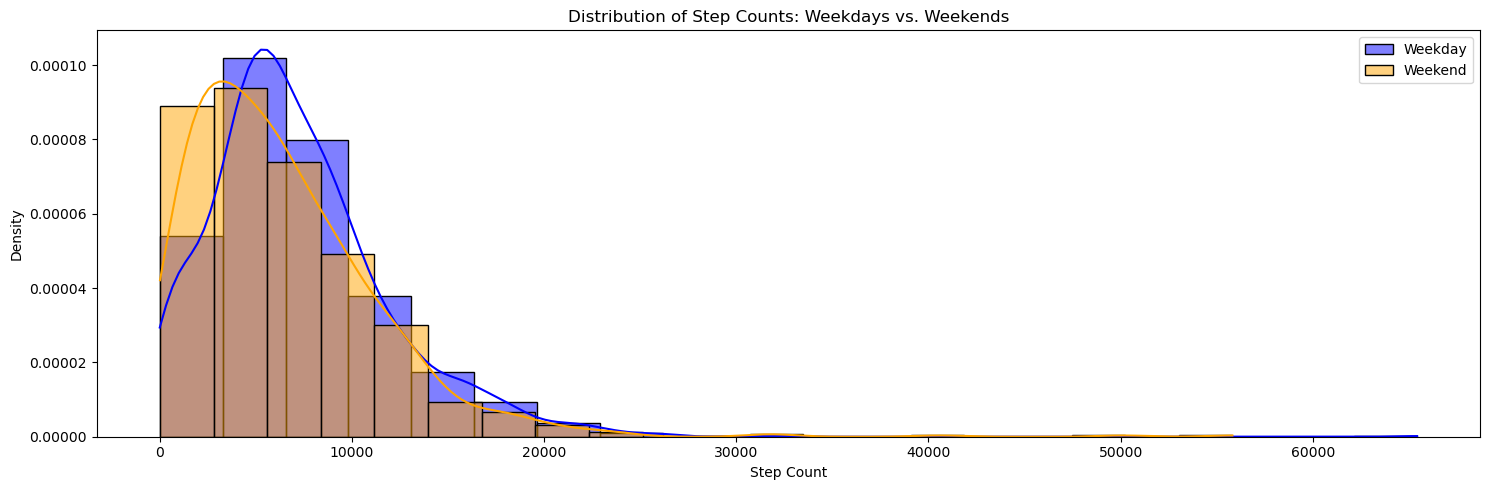

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Step_Excel_Apple.xlsx'
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} does not exist.")
    exit()

# Check the data to ensure it loaded correctly
print(data.head())

# Convert 'Date' column to datetime, if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column to identify weekends and weekdays
data['Day_Type'] = data['Date'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate mean step counts for weekends and weekdays
mean_weekend = data[data['Day_Type'] == 'Weekend']['Steps'].mean()
std_weekend = data[data['Day_Type'] == 'Weekend']['Steps'].std()
median_weekend = data[data['Day_Type'] == 'Weekend']['Steps'].median()

mean_weekday = data[data['Day_Type'] == 'Weekday']['Steps'].mean()
std_weekday = data[data['Day_Type'] == 'Weekday']['Steps'].std()
median_weekday = data[data['Day_Type'] == 'Weekday']['Steps'].median()

# Display the means, std, medians
print(f"Mean Steps on Weekends: {mean_weekend:.2f}")
print(f"Mean Steps on Weekdays: {mean_weekday:.2f}")
print()
print(f"Weekend Standard Deviation: {std_weekend:.2f}")
print(f"Weekday Standard Deviation: {std_weekday:.2f}")
print()
print(f"Weekend Median: {median_weekend:.2f}")
print(f"Weekday Median: {median_weekday:.2f}")

# Plot the distribution of step counts for weekends and weekdays
plt.figure(figsize=(15, 5))

# Histogram for Weekdays
sns.histplot(data[data['Day_Type'] == 'Weekday']['Steps'], bins=20, kde=True, color='blue', label='Weekday', stat='density', alpha=0.5)

# Histogram for Weekends
sns.histplot(data[data['Day_Type'] == 'Weekend']['Steps'], bins=20, kde=True, color='orange', label='Weekend', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: Weekdays vs. Weekends')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()







## Summer Holiday vs School Time

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864
Mean Steps in Summer Months: 8228.98
Mean Steps in Other Months: 6356.28



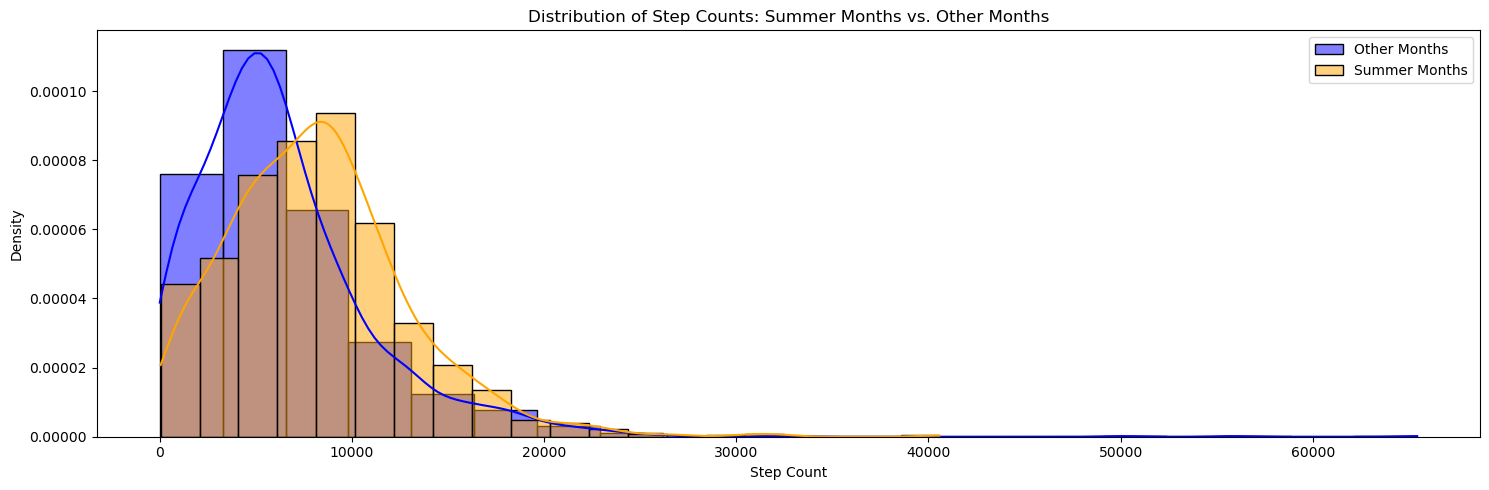

Mean: 6999.08
Standard Deviation: 4895.10
Median: 6171.00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Step_Excel_Apple.xlsx'
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} does not exist.")
    exit()

# Check the data to ensure it loaded correctly
print(data.head())

# Convert 'Date' column to datetime, if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column to identify summer and non-summer months
data['Season'] = data['Date'].dt.month.apply(lambda x: 'Summer' if x in [6, 7, 8, 9] else 'Other')

# Calculate mean step counts for summer and other months
mean_summer = data[data['Season'] == 'Summer']['Steps'].mean()
mean_other = data[data['Season'] == 'Other']['Steps'].mean()

# Display the means
print(f"Mean Steps in Summer Months: {mean_summer:.2f}")
print(f"Mean Steps in Other Months: {mean_other:.2f}")
print()

# Plot the distribution of step counts for summer and other months
plt.figure(figsize=(15, 5))

# Histogram for Other Months
sns.histplot(data[data['Season'] == 'Other']['Steps'], bins=20, kde=True, color='blue', label='Other Months', stat='density', alpha=0.5)

# Histogram for Summer Months
sns.histplot(data[data['Season'] == 'Summer']['Steps'], bins=20, kde=True, color='orange', label='Summer Months', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: Summer Months vs. Other Months')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate key attributes
mean = data['Steps'].mean()
std_dev = data['Steps'].std()
median = data['Steps'].median()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median: {median:.2f}")


## Year and Months

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864
Yearly Step Statistics:
   Year         mean          std  median
0  2015  5891.375000  2962.265054  5810.5
1  2016  8006.106557  4102.139244  7185.0
2  2017  8571.534247  3807.729114  8109.0
3  2018  7858.821752  6247.993441  6834.0
4  2019  7184.504110  3664.427358  6489.0
5  2020  5314.153005  3794.253472  4685.0
6  2021  4527.838356  3191.180675  3833.0
7  2022  6703.197260  5161.499478  5522.0
8  2023  9704.276712  5761.003341  8580.0
9  2024  4792.335640  5101.975867  3071.0

Monthly Step Statistics:
    Month         mean          std  median
0       1  6119.691756  3913.677466  5472.0
1       2  5581.327935  3907.002497  4967.0
2       3  5552.812274  3895.561834  4942.0
3       4  5404.267658  3709.098831  5072.0
4       5  5488.888489  4588.311566  4536.0
5       6  7822.724907  5337.584197  6910.0
6       7  8826.591398  4429.951269  8554.0
7       8  8481.

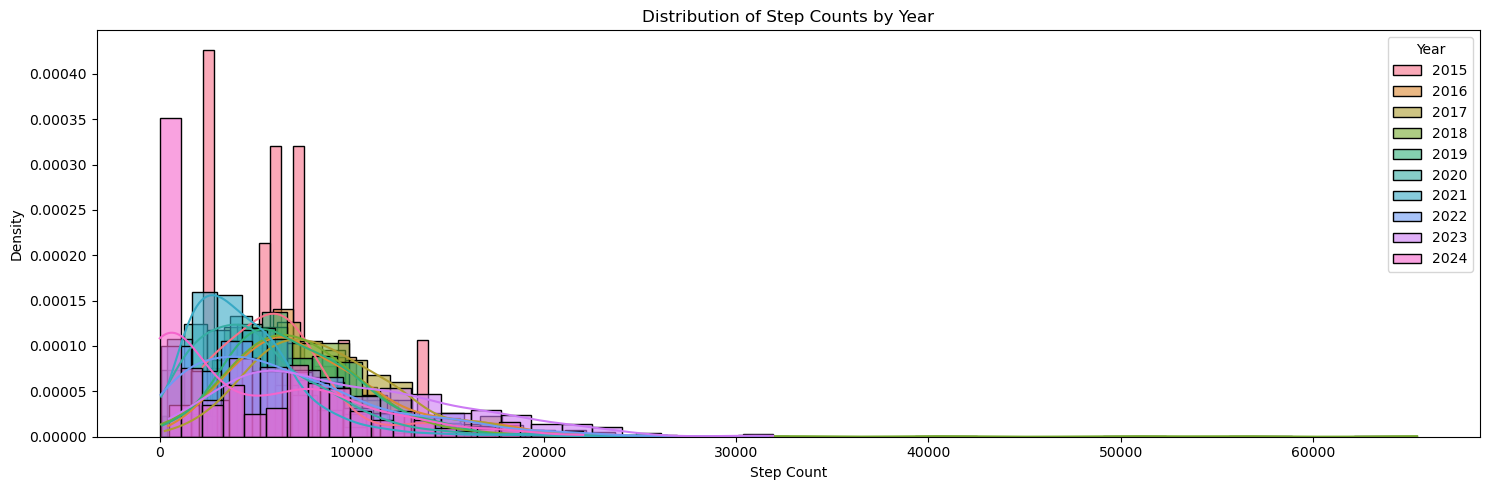

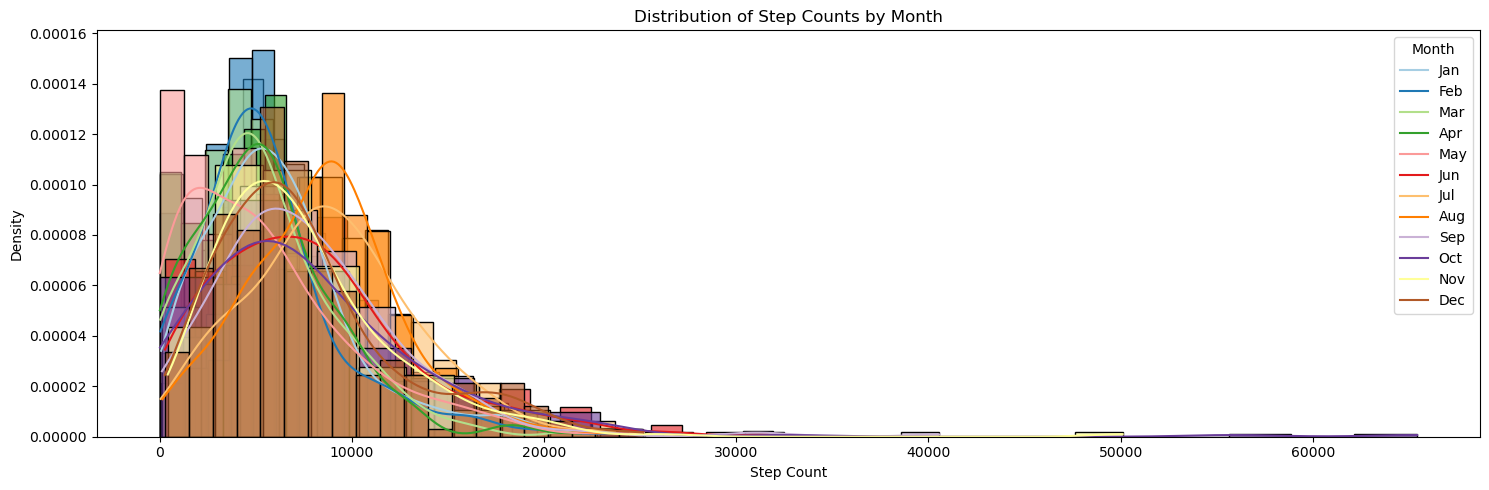

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Step_Excel_Apple.xlsx'
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} does not exist.")
    exit()

# Check the data to ensure it loaded correctly
print(data.head())

# Convert 'Date' column to datetime, if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year and Month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Calculate mean, std, median for each Year
yearly_stats = data.groupby('Year')['Steps'].agg(['mean', 'std', 'median']).reset_index()
print("Yearly Step Statistics:")
print(yearly_stats)

# Calculate mean, std, median for each Month (across all years)
monthly_stats = data.groupby('Month')['Steps'].agg(['mean', 'std', 'median']).reset_index()
print("\nMonthly Step Statistics:")
print(monthly_stats)

# Generate distinct colors for each year
unique_years = data['Year'].unique()
colors_years = sns.color_palette("husl", len(unique_years))

# Map colors to years
year_color_map = dict(zip(unique_years, colors_years))

# Plot the distribution of step counts for each year
plt.figure(figsize=(15, 5))
for year in unique_years:
    subset = data[data['Year'] == year]
    sns.histplot(subset['Steps'], bins=20, kde=True, color=year_color_map[year], label=f"{year}", stat='density', alpha=0.6)

plt.title('Distribution of Step Counts by Year')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend(title='Year', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()

# Generate distinct colors for months
colors_months = sns.color_palette("Paired", 12)

# Plot the distribution of step counts for each month
plt.figure(figsize=(15, 5))
for month in range(1, 13):
    subset = data[data['Month'] == month]
    sns.histplot(subset['Steps'], bins=20, kde=True, color=colors_months[month - 1], label=f"{month:02d}", stat='density', alpha=0.6)

plt.title('Distribution of Step Counts by Month')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend(title='Month', loc='upper right', frameon=True, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()
